# PUI HW 4
### Assignment 1:
Test if the distribution of ages is the same for 
    
 1) male and femal riders
    
 2) day and night riders
    
 use 3 tests: KS, Pearson's, Spearman's

###  1) male and femal riders:

In [14]:
# Import ralevant modouls. 
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import json
s = json.load( open(os.getenv ('PUI2015')+"/ylai_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


In this study I'm using data from July 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. 

In [15]:
df=pd.read_csv(os.getenv ('PUI2015')+'/data/201507-citibike-tripdata.csv')
print df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


###BY GENDER
Splitting data by gender and extracting the age happens in the cell below.

In [16]:
#df is the dataframe where the content of the csv file is stored. 
#Since only subscribers have data of age, therefore we will use the data by subscribers only.
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

Now we split age in 10 year bins. The dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. If i was to do this "for real" the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

The next several steps are needed if you want to code up the KS test from scratch. That is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! Remember Ascombe's quartet!!

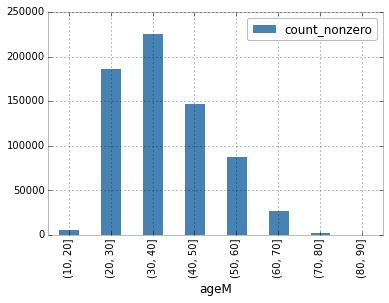

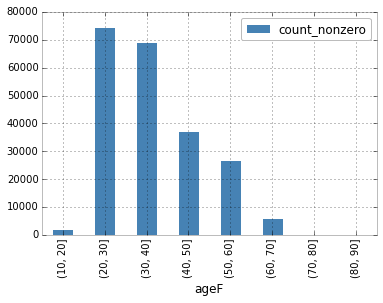

In [17]:
bins = np.arange(10, 99, 10)
df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar')
df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar')

This is how the cumulative distributions look like.  Notice that I am normalizing them! If i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 20]       0.000753
(20, 30]       0.072901
(30, 40]       0.063428
(40, 50]       0.020371
(50, 60]       0.014432
(60, 70]       0.002502
(70, 80]       0.000320
(80, 90]       0.000000


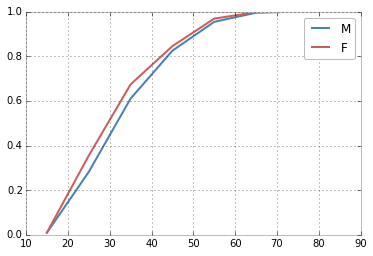

In [18]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print np.abs(csM / csM.max()-csF / csF.max())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.legend()

They look pretty darn similar! That sets my expectation for the tests to come. If I wanted to code the KS test by hand i woud have everything i need: the normalized cumulative distributions can be subtracted from each other and the max distance can be seeked. 

Notice that there amay be Nan values you are gonna have to deal with! you can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

Lets run the scipy KS test

#KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [19]:
import scipy.stats

In [20]:
ks=scipy.stats.ks_2samp(df.ageM, df.ageF)

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1+n2)}{n1n2}}$

where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But scipy is already giving you the p-value, so you do not have to worry about it I am still giving you the table FWI and if you want to do the coding of the KS test by hand.


In [21]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
#Image(filename="ks2sample_table.png")

In [22]:
##This cell is for you to tell me what the scipy KS test returned and what it means
print ks

(0.43313198412786136, 0.0)


#Pearson's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [23]:
#please perform the Pearson's test and tell me what you find.
scipy.stats.pearsonr(df.ageM, df.ageF)

(nan, 1.0)

#Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [24]:
#Please perform the Spearman's test and tell me what you find.
scipy.stats.spearmanr(df.ageM, df.ageF, axis=0)

(-0.36204402355786297, 0.0)

##please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

 ### 2) day and night riders



In [27]:
df.starttime[:5]

0    7/1/2015 00:00:03
1    7/1/2015 00:00:06
2    7/1/2015 00:00:17
3    7/1/2015 00:00:23
4    7/1/2015 00:00:44
Name: starttime, dtype: object

In [30]:
#Re-format start time column as a new column named as "mystarttime". 
df['time'] = pd.to_datetime(df['starttime'])
df.time[:5]

0   2015-07-01 00:00:03
1   2015-07-01 00:00:06
2   2015-07-01 00:00:17
3   2015-07-01 00:00:23
4   2015-07-01 00:00:44
Name: time, dtype: datetime64[ns]

In [32]:
#df is the dataframe where the content of the csv file is stored. 
#Since only subscribers have data of age, therefore we will use the data by subscribers only.
#In this study, we define day time as 6am-6pm (6-18) and else as night time. 
df['age_day'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['time'].dt.hour>=6) & (df['time'].dt.hour<18)]
df['age_night'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['time'].dt.hour>=18)|(df['time'].dt.hour<6)]

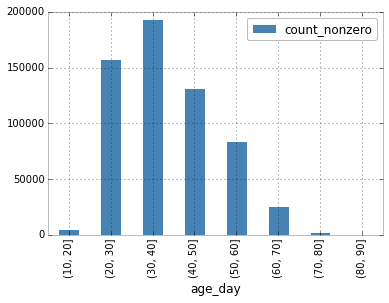

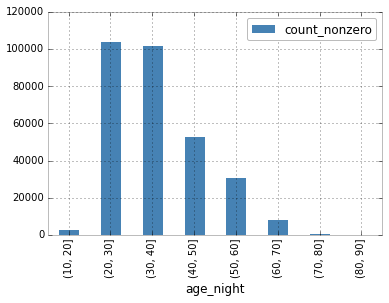

In [34]:
bins = np.arange(10, 99, 10)
df.age_day.groupby(pd.cut(df.age_day, bins)).agg([count_nonzero]).plot(kind='bar')
df.age_night.groupby(pd.cut(df.age_night, bins)).agg([count_nonzero]).plot(kind='bar')

          count_nonzero
age_day                
(10, 20]       0.002924
(20, 30]       0.083677
(30, 40]       0.098509
(40, 50]       0.055049
(50, 60]       0.016811
(60, 70]       0.002347
(70, 80]       0.000101
(80, 90]       0.000000


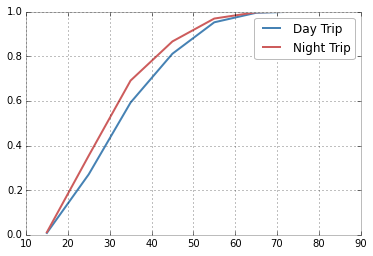

In [36]:
#print df.ageS, df.ageS.cumsum()

cs_D=df.age_day.groupby(pd.cut(df.age_day, bins)).agg([count_nonzero]).cumsum()

cs_N=df.age_night.groupby(pd.cut(df.age_night, bins)).agg([count_nonzero]).cumsum()

print np.abs(cs_D / cs_D.max()-cs_N / cs_N.max())

pl.plot(bins[:-1] + 5, cs_D / cs_D.max(), label = "Day Trip")
pl.plot(bins[:-1] + 5, cs_N / cs_N.max(), label = "Night Trip")
pl.legend()

In [38]:
import scipy.stats
ks = scipy.stats.ks_2samp(df.age_day.dropna(), df.age_night.dropna())
print ks

(0.10727215712919941, 0.0)


In [39]:
#The Pearson's test and tell me what you find
df_clean_day = df.age_day.dropna()
df_clean_night = df.age_night.dropna()

print len(df_clean_day)
print len(df_clean_night)

601497
303814


In [41]:
# Perform the Pearson's test:
df_clean_day = np.random.choice(df_clean_day,len(df_clean_night),replace=False)
pearsonr= scipy.stats.pearsonr(df_clean_day, df_clean_night)
print pearsonr

(-0.00075695204120540733, 0.6765136947214565)


In [ ]:
# Perform the Spearman's test:
spearman = scipy.stats.spearmanr(df_clean_night, df_clean_day)
print spearman